In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib

data_dir = pathlib.Path("C:\\Users\\2276605\\OneDrive - Cognizant\\Documents\\Project SOLO\\Image Classification\\image_classification_model-main\\images_dataset")

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1.0 / 255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

num_classes = len(class_names)

model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Found 5313 files belonging to 5 classes.
Using 4251 files for training.
Found 5313 files belonging to 5 classes.
Using 1062 files for validation.
Classes: ['hoodie', 'pants', 'shirts', 'shoes', 'shorts']


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,023,877 (30.61 MB)

 Trainable params: 8,023,877 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 85s 469ms/step - accuracy: 0.5842 - loss: 1.1858 - val_accuracy: 0.8296 - val_loss: 0.5012
Epoch 2/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 62s 469ms/step - accuracy: 0.8432 - loss: 0.4610 - val_accuracy: 0.8635 - val_loss: 0.4214
Epoch 3/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 74s 561ms/step - accuracy: 0.8792 - loss: 0.3554 - val_accuracy: 0.8776 - val_loss: 0.3526
Epoch 4/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 73s 549ms/step - accuracy: 0.9054 - loss: 0.2738 - val_accuracy: 0.8766 - val_loss: 0.3908
Epoch 5/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 66s 497ms/step - accuracy: 0.9206 - loss: 0.2324 - val_accuracy: 0.8945 - val_loss: 0.3107
Epoch 6/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 71s 535ms/step - accuracy: 0.9332 - loss: 0.1812 - val_accuracy: 0.8861 - val_loss: 0.3905
Epoch 7/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 72s 544ms/step - accuracy: 0.9358 - loss: 0.1712 - val_accuracy: 0.9021 - val_loss: 0.3115
Epoch 8/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 72s 544ms/step - accuracy: 0.9689 - loss: 0

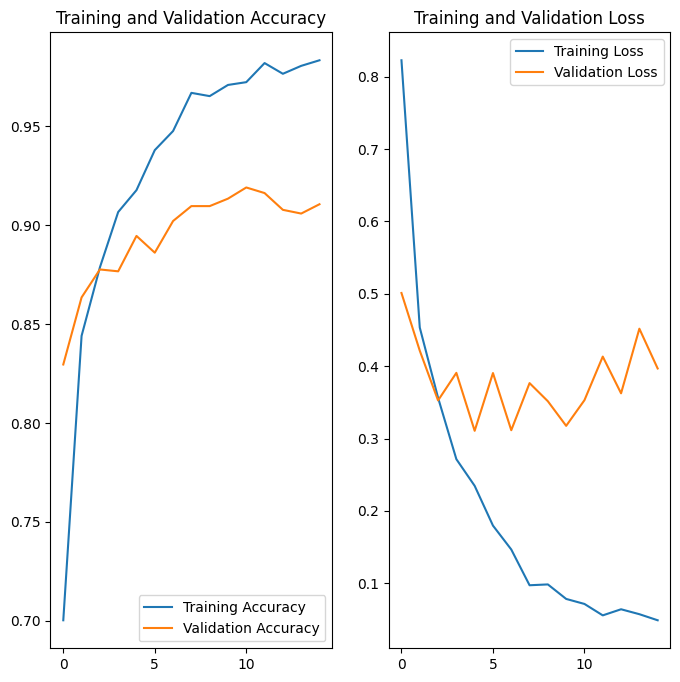

In [2]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,023,877 (30.61 MB)

 Trainable params: 8,023,877 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 88s 647ms/step - accuracy: 0.5511 - loss: 1.1755 - val_accuracy: 0.8399 - val_loss: 0.4950
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 93s 695ms/step - accuracy: 0.8378 - loss: 0.4623 - val_accuracy: 0.8682 - val_loss: 0.3887
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 142s 700ms/step - accuracy: 0.8859 - loss: 0.3330 - val_accuracy: 0.8710 - val_loss: 0.4016
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 106s 797ms/step - accuracy: 0.9038 - loss: 0.2679 - val_accuracy: 0.8879 - val_loss: 0.3197
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 100s 753ms/step - accuracy: 0.9273 - loss: 0.2131 - val_accuracy: 0.8974 - val_loss: 0.3177
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 129s 656ms/step - accuracy: 0.9503 - loss: 0.1458 - val_accuracy: 0.9218 - val_loss: 0.2904
Epoch 7/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 90s 676ms/step - accuracy: 0.9566 - loss: 0.1103 - val_accuracy: 0.9096 - val_loss: 0.3057
Epoch 8/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 92s 692ms/step - accuracy: 0.9655 - los

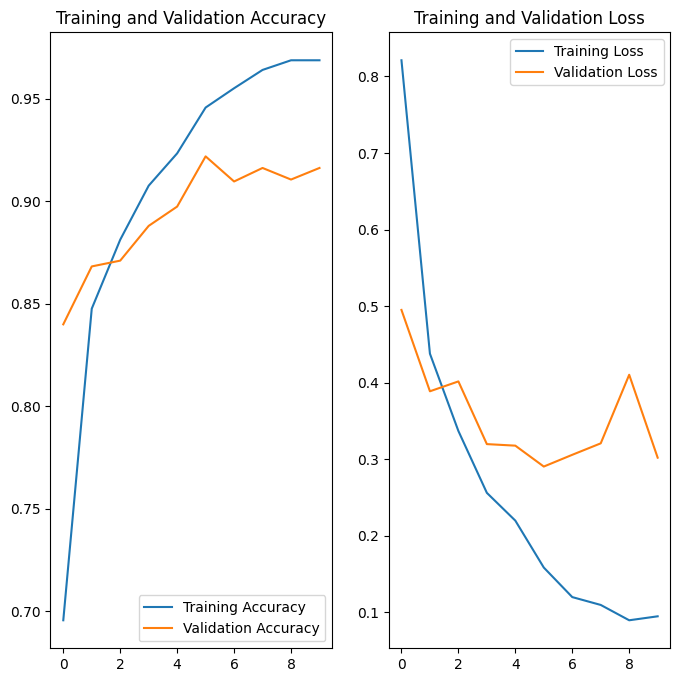

In [4]:
data_augmentation = keras.Sequential([
    Input(shape=(img_height, img_width, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
import PIL
img_path = "C:\\Users\\2276605\\Downloads\\1.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\2.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\3.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\4.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\5.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\6.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\7.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
This image most likely belongs to shirts with a 38.95% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
This image most likely belongs to shorts with a 38.14% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This image most likely belongs to pants with a 38.57% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This image most likely belongs to hoodie with a 29.58% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This image most likely belongs to shoes with a 40.45% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
This image most likely belongs to shirts with a 39.33% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
This image most likely belongs to hoodie with a 40.44% confidence.


In [7]:
os.makedirs("C:\\Users\\2276605\\OneDrive - Cognizant\\Documents\\Project SOLO\\Image Classification\\image_classification_model-main\\saved_model", exist_ok=True)
model.save("C:\\Users\\2276605\\OneDrive - Cognizant\\Documents\\Project SOLO\\Image Classification\\image_classification_model-main\\saved_model\\image_classification_model_new.keras")